# Keras Sequential Model Lab Exercise
## Lab Objectives:
### Upon completion of this lab, students will be able to:
* Understand the concept and structure of Keras Sequential models.
* Load and preprocess data for neural network training.
* Build, compile, and train simple feedforward neural networks.
* Evaluate the performance of a trained model.
* Implement basic Convolutional Neural Networks (CNNs) using the Sequential API.
* Make predictions using a trained model.



## Part 1: Introduction to Keras Sequential Model
The Keras Sequential model is a linear stack of layers. It's the simplest type of model and is suitable for simple feedforward networks (MLPs), as well as basic Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).

### Task 1.1: Import Keras and Define a Simple Sequential Model
Just for demonstration, let's start by defining a very simple model with just one input layer and one output layer.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create a Sequential model
model = keras.Sequential(
[
# Input layer (implicitly defined by the first layer's input_shape)
# This Dense layer will have 10 units and expects input with 784 features.
layers.Dense(units=10, activation="relu", input_shape=(784,))
]
)

# Print a summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

#### Explanation:
* tf.keras.Sequential: This is the class we use to create a sequential model.
* layers.Dense: This represents a fully connected neural network layer.
    * units: The number of neurons in this layer.
    * activation: The activation function to use (e.g., 'relu', 'sigmoid', 'softmax').
    * input_shape: This argument is crucial for the first layer in a Sequential model. It tells Keras the shape of the input data it expects. For subsequent layers, Keras automatically infers the input shape from the previous layer's output.



## Part 2: Data Preparation (MNIST Dataset)
We will use the MNIST dataset, which consists of images of handwritten digits (0-9). Each image is 28x28 pixels.

### Task 2.1: Load and Preprocess the MNIST Dataset


In [9]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = (
 keras.datasets.mnist.load_data()
)

print(f"Original training images shape: {train_images.shape}")
print(f"Original testing images shape: {test_images.shape}")

# Normalize pixel values to be between 0 and 1
# Original pixel values are between 0 and 255
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for a simple feedforward network
# Each 28x28 image needs to be flattened into a 784-element vector
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

print(f"Flattened training images shape: {train_images_flat.shape}")
print(f"Flattened testing images shape: {test_images_flat.shape}")

# One-hot encode the labels
# For example, the digit '5' will become [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

print(f"One-hot encoded training labels shape: {train_labels_one_hot.shape}")
print(f"First 5 original training labels: {train_labels[:5]}")
print(f"First 5 one-hot encoded training labels:\n{train_labels_one_hot[:5]})")


Original training images shape: (60000, 28, 28)
Original testing images shape: (10000, 28, 28)
Flattened training images shape: (60000, 784)
Flattened testing images shape: (10000, 784)
One-hot encoded training labels shape: (60000, 10)
First 5 original training labels: [5 0 4 1 9]
First 5 one-hot encoded training labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]])


### Explanation:
* keras.datasets.mnist.load_data(): Conveniently loads the MNIST dataset.
* Normalization: Dividing by 255.0 scales the pixel values from [0, 255] to [0, 1]. This helps neural networks learn more effectively.
* Reshaping (.reshape(-1, 28 * 28)):
    * -1 means "infer the dimension based on the total number of elements and the other dimension." So, it will automatically calculate the number of samples.
    * 28 * 28 = 784: Each 28x28 image is flattened into a single vector of 784 pixels. This is necessary for Dense layers, which expect 1D input vectors.
* One-hot Encoding (keras.utils.to_categorical):
    * Our labels are single digits (0-9). For multi-class classification, especially with softmax activation in the output layer and categorical_crossentropy loss, we need to convert these integer labels into a binary vector format.
    * num_classes=10: Since there are 10 possible digits (0-9).


## Part 3: Building and Training a Simple Classifier
Now, let's build a simple multi-layer perceptron (MLP) using the Sequential API to classify the MNIST digits.
### Task 3.1: Define the Model Architecture


In [11]:
# Define the Sequential model
model = keras.Sequential(
[
# Flatten layer to convert 28x28 images into a 784-element vector
# This is an alternative to manually reshaping the data beforehand.
layers.Flatten(input_shape=(28, 28)),
# First hidden layer with 128 neurons and ReLU activation
layers.Dense(units=128, activation="relu"),
# Output layer with 10 neurons (for 10 classes) and Softmax activation
# Softmax ensures the output probabilities sum to 1.
layers.Dense(units=10, activation="softmax"), ]
)
# Print the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Explanation:
* layers.Flatten(input_shape=(28, 28)): This layer automatically flattens the input images from 2D (28x28) to 1D (784). If you used train_images_flat from Part 2, you wouldn't need this layer. However, it's good practice to include it if your input data is still in its original image shape.
* layers.Dense(units=128, activation='relu'): A hidden layer with 128 neurons. ReLU (Rectified Linear Unit) is a common activation function that introduces non-linearity.
* layers.Dense(units=10, activation='softmax'): The output layer.
    * units=10: One neuron for each of the 10 digit classes.
    * activation='softmax': This activation function is used for multi-class classification problems. It converts the raw outputs (logits) into probabilities that sum up to 1 across all classes.


## Task 3.2: Compile the Model
Compiling the model configures its learning process. You specify the optimizer, loss function, and metrics.


In [12]:
# setting learning rate
# Choose an optimizer and set the learning rate
# Example with Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
optimizer=optimizer, # Adam is a popular optimization algorithm
# optimizer='adam', # You can also use 'adam
loss="categorical_crossentropy", # Appropriate loss for multi-class classification with one-hot encoded labels
metrics=["accuracy"], # Metric to monitor during training
)

print("Model compiled successfully!")


Model compiled successfully!


## Explanation:
* optimizer='adam': The optimizer determines how the model's weights are updated during training to minimize the loss. Adam is a good general-purpose optimizer. Other options include 'sgd', 'rmsprop', etc.
* loss='categorical_crossentropy': This is the standard loss function for multi-class classification problems where the labels are one-hot encoded. If your labels were integers (not one-hot encoded), you would use sparse_categorical_crossentropy.
* metrics=['accuracy']: This is a list of metrics to be evaluated by the model during training and testing. 'accuracy' is a common choice for classification tasks.




## Task 3.3: Train the Model
Training involves feeding the model with training data and allowing it to learn the patterns.


In [13]:
# Train the model
# We use the original 28x28 images because we added a Flatten layer.
history = model.fit(
train_images,
train_labels_one_hot,
epochs=15, # 15 epochs are going to be executed
batch_size=50, # Number of samples per gradient update
validation_split=0.1, # Use 10% of training data for validation during training,
)

print("\nModel training complete!")



Epoch 1/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.5048 - val_accuracy: 0.9662 - val_loss: 0.1347
Epoch 2/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9579 - loss: 0.1462 - val_accuracy: 0.9715 - val_loss: 0.0989
Epoch 3/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9719 - loss: 0.0959 - val_accuracy: 0.9727 - val_loss: 0.0940
Epoch 4/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0687 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 5/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0534 - val_accuracy: 0.9745 - val_loss: 0.0838
Epoch 6/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9873 - loss: 0.0424 - val_accuracy: 0.9752 - val_loss: 0.0893
Epoch 7/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9898 - loss: 0.0343 - val_accuracy: 0.9772 - val_loss: 0.0804
Epoch 8/15
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9924 - loss: 0.0253 - 

## Explanation:
* model.fit(): This function trains the model.
    * train_images: The training input data.
    * train_labels_one_hot: The corresponding target labels (one-hot encoded).
    * epochs: An epoch is one complete pass through the entire training dataset. More epochs generally lead to better learning but can also lead to overfitting.
    * batch_size: The number of samples processed before the model's weights are updated. Smaller batch sizes can lead to more noisy updates but potentially better generalization. Larger batch sizes are faster but might get stuck in local minima.
    * validation_split: A fraction of the training data to be set aside as validation data. The model will not be trained on this data, and its performance on this data will be evaluated at the end of each epoch. This helps in monitoring for overfitting.



## Task 3.4: Plotting Accuracy over epocs


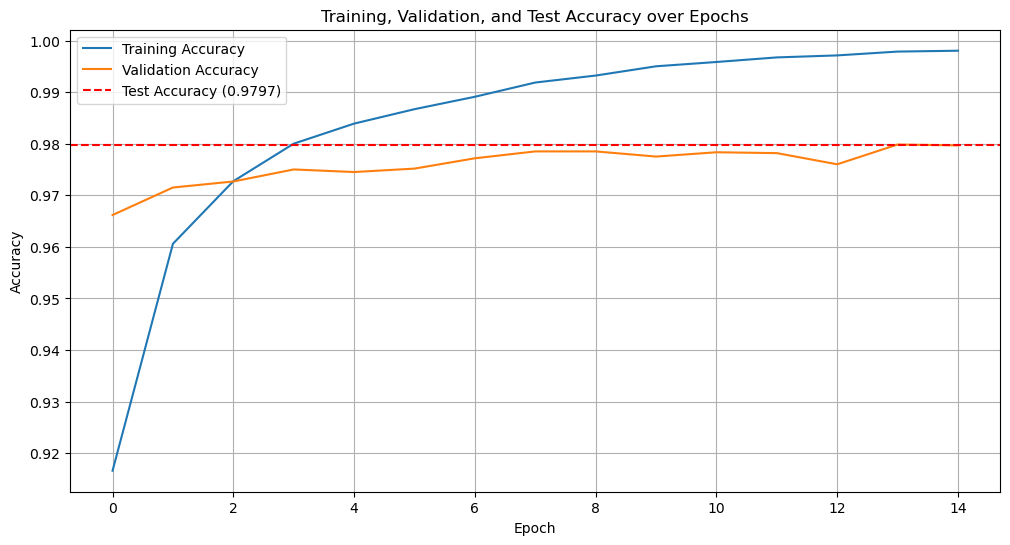

In [14]:
import matplotlib.pyplot as plt

# Evaluate the model on the test data to get the test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0) # verbose=0 to avoid printing progress during evaluation

# Assuming 'history' is the object returned by model.fit()
# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.4f})') # Plotting test accuracy
plt.title('Training, Validation, and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Part 4: Evaluation and Prediction
After training, it's crucial to evaluate the model's performance on unseen data (the test set) and use it to make predictions.
### Task 4.1: Evaluate the Model on Test Data

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 0s - 936us/step - accuracy: 0.9797 - loss: 0.0799
Test Accuracy: 0.9797


## Explanation:
* model.evaluate(): This function calculates the loss and metrics (like accuracy) for the given data.
    * test_images: The input test data.
    * test_labels_one_hot: The true labels for the test data.
    * verbose=2: Prints one line per epoch.


## Task 4.2: Make Predictions
##### Make predictions on the test images
##### predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step

Probabilities for the first test image:
[1.2793840e-10 2.3893024e-13 1.8758349e-10 3.2016571e-06 2.7171599e-17
 7.3942047e-11 5.2913852e-16 9.9999630e-01 2.4528180e-08 4.5112188e-07]
Predicted class for the first test image: 7
True class for the first test image: 7


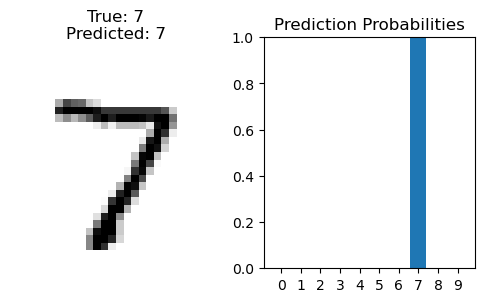

In [16]:
# Make predictions on the test images
predictions = model.predict(test_images)

# The output of predict is a probability distribution for each image
# For example, predictions[0] is an array of 10 probabilities for first test image.
print(f"\nProbabilities for the first test image:\n{predictions[0]}")

# To get the predicted class, we take the index with the highest probability
predicted_class = np.argmax(predictions[0])
true_class = test_labels[0]

print(f"Predicted class for the first test image: {predicted_class}")
print(f"True class for the first test image: {true_class}")

# Let's visualize the first test image and its prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f"True: {true_class}\nPredicted: {predicted_class}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.ylim([0, 1])
plt.title("Prediction Probabilities")
plt.show()

## Explanation:
* model.predict(): Generates output predictions for the input samples. The output is an array of probabilities for each class.
* np.argmax(predictions[0]): Returns the index of the maximum value in the array, which corresponds to the predicted class with the highest probability.
* matplotlib.pyplot: Used for visualizing the image and the prediction probabilities.


# **Exercises and Challenges**

# Exercise 1
Now it's your turn to experiment!
1. Experiment with Hyperparameters:
    * Modify the number of epochs and batch_size in the model. How does this affect training time and accuracy?
    * Try different optimizers (e.g., 'sgd', 'rmsprop') and observe their impact.
    * Change the activation functions in the hidden layers (e.g., 'sigmoid', 'tanh').
2. Modify Model Architecture (MLP):
    * Add more Dense layers to the MLP model. What happens to the accuracy?
    * Change the number of units in the hidden layers.
3. Explore Different Datasets (Advanced):
    * Load and classify the Fashion MNIST dataset (keras.datasets.fashion_mnist.load_data()). It's similar to MNIST but with clothing items instead of digits. You'll need to adapt the input shape and output classes.
    * Research how to use a different dataset from tf.keras.datasets (e.g., cifar10).
4. Plot Training History:
    * The model.fit() method returns a history object. This object contains the loss and metric values for each epoch during training and validation.
    * Plot the training and validation accuracy over epochs.
    * Plot the training and validation loss over epochs.
    * Example:


# Deliverabled

* 1- Endorsement of practicing with the code in the notebook (no need to submit anything).
* 2- The completed ipynb file for Fashion MNIST dataset.
* 3- The completed ipyng file for one of the other datasets of tf.keras.datasets of your choice (https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

***LAB ANSWERS and EXPLANATION***

**1. Experiment with Hyperparameters:**
- increased epoch to 20 from 15, decreased batch size from 50 to 30 and accuracy went down a bit from .9797 to .9785
- changed optimizer to SGD and accuracy went down further to .9808

**2. Modify Model Architecture (MLP):**
- added layer of sigmoid, and increased its units to 256 and added anohter relu layer, increasing units to 128 and accuracy went to .9405

**3. Explore Different Datasets (Advanced):**
- using fashion mnsit dataset, got accuracy of .9682
- for cifar10, got accuracy of 0.6841

**4. Plot Training History**
  - pls see graph below

In [17]:
# Train the model
# We use the original 28x28 images because we added a Flatten layer.
history = model.fit(
train_images,
train_labels_one_hot,
epochs=20, # 15 epochs are going to be executed
batch_size=30, # Number of samples per gradient update
validation_split=0.1, # Use 10% of training data for validation during training,
)

print("\nModel training complete!")


Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9945 - loss: 0.0165 - val_accuracy: 0.9780 - val_loss: 0.1037
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9768 - val_loss: 0.1050
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9780 - val_loss: 0.1131
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9770 - val_loss: 0.1162
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9795 - val_loss: 0.1030
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9777 - val_loss: 0.1212
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0054 - val_accuracy: 0.9795 - val_loss: 0.1092
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0059 - 

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9785 - loss: 0.1351
Test Accuracy: 0.9785


In [19]:
# setting learning rate
# Choose an optimizer and set the learning rate
# Example with Adam optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
#optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
optimizer=optimizer, # Adam is a popular optimization algorithm
# optimizer='adam', # You can also use 'adam
loss="categorical_crossentropy", # Appropriate loss for multi-class classification with one-hot encoded labels
metrics=["accuracy"], # Metric to monitor during training
)

print("Model compiled successfully!")

Model compiled successfully!


In [21]:
# Train the model
# We use the original 28x28 images because we added a Flatten layer.
history = model.fit(
train_images,
train_labels_one_hot,
epochs=20, # 15 epochs are going to be executed
batch_size=30, # Number of samples per gradient update
validation_split=0.1, # Use 10% of training data for validation during training,
)

print("\nModel training complete!")


Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9793 - val_loss: 0.1257
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9999 - loss: 7.5721e-04 - val_accuracy: 0.9792 - val_loss: 0.1247
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 5.2309e-04 - val_accuracy: 0.9795 - val_loss: 0.1243
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 4.5561e-04 - val_accuracy: 0.9797 - val_loss: 0.1241
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 3.5761e-04 - val_accuracy: 0.9798 - val_loss: 0.1238
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 3.2126e-04 - val_accuracy: 0.9797 - val_loss: 0.1236
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 3.1457e-04 - val_accuracy: 0.9793 - val_loss: 0.1235
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 0s - 938us/step - accuracy: 0.9808 - loss: 0.1164
Test Accuracy: 0.9808


In [23]:
# Define the Sequential model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(units=256, activation="sigmoid"),  # More units (was 128)
    layers.Dense(units=128, activation="relu"),  # More units (was 64)
    layers.Dense(units=10, activation="softmax"),
])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# setting learning rate
# Choose an optimizer and set the learning rate
# Example with Adam optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
#optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
optimizer=optimizer, # Adam is a popular optimization algorithm
# optimizer='adam', # You can also use 'adam
loss="categorical_crossentropy", # Appropriate loss for multi-class classification with one-hot encoded labels
metrics=["accuracy"], # Metric to monitor during training
)

print("Model compiled successfully!")

Model compiled successfully!


In [26]:
# Train the model
# We use the original 28x28 images because we added a Flatten layer.
history = model.fit(
train_images,
train_labels_one_hot,
epochs=20, # 15 epochs are going to be executed
batch_size=30, # Number of samples per gradient update
validation_split=0.1, # Use 10% of training data for validation during training,
)

print("\nModel training complete!")

Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5392 - loss: 1.7083 - val_accuracy: 0.8768 - val_loss: 0.5366
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8581 - loss: 0.5332 - val_accuracy: 0.9085 - val_loss: 0.3479
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8880 - loss: 0.4014 - val_accuracy: 0.9177 - val_loss: 0.2957
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8982 - loss: 0.3534 - val_accuracy: 0.9183 - val_loss: 0.2764
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9043 - loss: 0.3330 - val_accuracy: 0.9233 - val_loss: 0.2616
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9060 - loss: 0.3227 - val_accuracy: 0.9278 - val_loss: 0.2485
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9126 - loss: 0.3047 - val_accuracy: 0.9307 - val_loss: 0.2428
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9148 - loss: 0.2937 - 

In [27]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9405 - loss: 0.2019
Test Accuracy: 0.9405


In [28]:
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Check shapes
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# setting learning rate
# Choose an optimizer and set the learning rate
# Example with Adam optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
#optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
optimizer=optimizer, # Adam is a popular optimization algorithm
# optimizer='adam', # You can also use 'adam
loss="categorical_crossentropy", # Appropriate loss for multi-class classification with one-hot encoded labels
metrics=["accuracy"], # Metric to monitor during training
)

print("Model compiled successfully!")

# Train the model
# We use the original 28x28 images because we added a Flatten layer.
history = model.fit(
train_images,
train_labels_one_hot,
epochs=20, # 15 epochs are going to be executed
batch_size=30, # Number of samples per gradient update
validation_split=0.1, # Use 10% of training data for validation during training,
)

print("\nModel training complete!")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

(60000, 28, 28)
(60000,)
Model compiled successfully!
Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7238 - loss: 1.0524 - val_accuracy: 0.9165 - val_loss: 0.3121
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.3528 - val_accuracy: 0.9298 - val_loss: 0.2542
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9158 - loss: 0.2930 - val_accuracy: 0.9405 - val_loss: 0.2209
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9248 - loss: 0.2631 - val_accuracy: 0.9438 - val_loss: 0.2016
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9306 - loss: 0.2424 - val_accuracy: 0.9497 - val_loss: 0.1847
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9378 - loss: 0.2212 - val_accuracy: 0.9535 - val_loss: 0.1735
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9420 - loss: 0.2071 - val_accuracy: 0.9580 - val_loss: 0.1620
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━

In [30]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# 1. Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalize inputs
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. One-hot encode labels
train_labels_one_hot = to_categorical(y_train, 10)
test_labels_one_hot = to_categorical(y_test, 10)

# 4. Model definition (unchanged)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Compile
from tensorflow import keras
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
print("Model compiled successfully!")

# 6. Train
history = model.fit(
    x_train,
    train_labels_one_hot,
    epochs=20,
    batch_size=30,
    validation_split=0.1,
)

print("\nModel training complete!")

# 7. Evaluate
test_loss, test_accuracy = model.evaluate(x_test, test_labels_one_hot, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


Model compiled successfully!
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2064 - loss: 2.1381 - val_accuracy: 0.3508 - val_loss: 1.7987
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3990 - loss: 1.6824 - val_accuracy: 0.4606 - val_loss: 1.4823
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4714 - loss: 1.4702 - val_accuracy: 0.5212 - val_loss: 1.3564
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5255 - loss: 1.3472 - val_accuracy: 0.5472 - val_loss: 1.2854
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5514 - loss: 1.2659 - val_accuracy: 0.5670 - val_loss: 1.2284
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5820 - loss: 1.1886 - val_accuracy: 0.5980 - val_loss: 1.1581
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6050 - loss: 1.1292 - val_accuracy: 0.6100 - val_loss: 1.1199
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - a

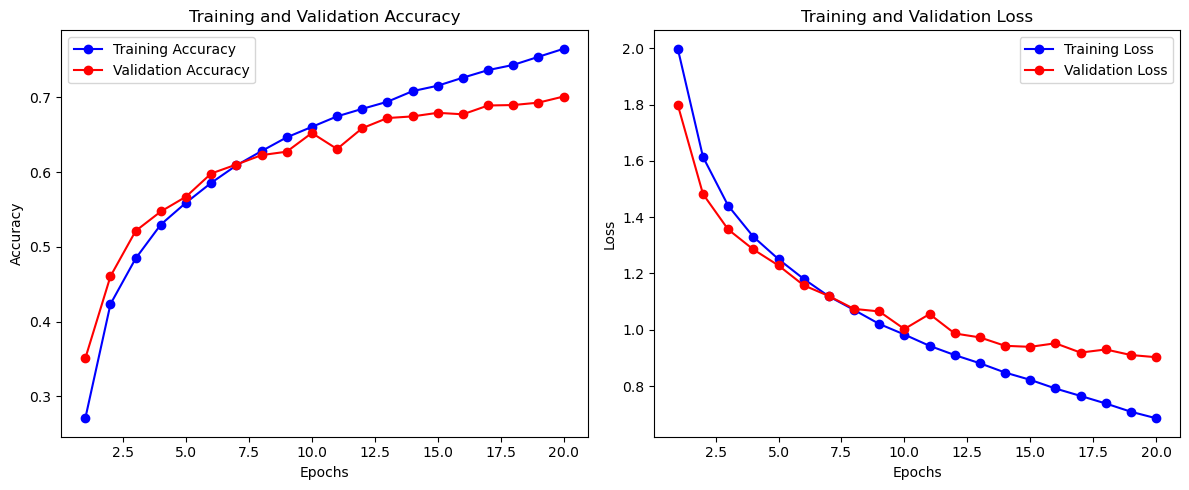

In [31]:
import matplotlib.pyplot as plt

# Assume 'history' is the output from model.fit()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
